## Machine Learning: An Example of Complete Regression

In this guided notebook we are going to compare a bit algorithms for regression and show everything you'll need.

#### 1.0 — Initial Libraries to Import

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 2.0 — DATA IMPORT
In this part, we import the data we are going to use.

In [147]:
data = pd.DataFrame(pd.read_excel('datasets/regression.xlsx'))

#### 3.0 — DATA STATISTICS
In this part, to get to know the dataframe, we have shared some mathematical statistics for the data.

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1575 non-null   int64  
 1   Position     1575 non-null   object 
 2   Name         1575 non-null   object 
 3   Driver Tag   1575 non-null   object 
 4   Nationality  1575 non-null   object 
 5   Team         1564 non-null   object 
 6   Points       1575 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 86.3+ KB


As we see above, position column is an object, so there will be string feature sneaked into integer features. Let's fix that.

In [149]:
new = []
for i in data['Position']:
    try:
        new.append(i/1)
    except:
        new.append(20)

data['Position'] = new

In [150]:
data.describe()

,Year,Position,Points
count,1575.000000,1575.000000,1575.000000
mean,1985.193016,11.438095,27.820952
std,20.768270,6.452235,53.683241
min,1950.000000,1.000000,0.000000
25%,1967.000000,6.000000,3.000000
50%,1985.000000,11.000000,8.000000
75%,2004.000000,17.000000,29.000000
max,2020.000000,28.000000,413.000000


This attribute is simply determines how many vacant features in this provided columns.

In [151]:
data.isna().sum()

Year            0
Position        0
Name            0
Driver Tag      0
Nationality     0
Team           11
Points          0
dtype: int64

In [152]:
data.corr()

C:\Users\lenovo\AppData\Local\Temp/ipykernel_24556/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Year,Position,Points
Year,1.000000,0.067347,0.378865
Position,0.067347,1.000000,-0.516554
Points,0.378865,-0.516554,1.000000


#### 4.0 — MANIPULATING & ENCODING
In this part, we are removing the string columns / nan value columns from our dataset, the reason behind is:

* String columns / NaN value columns cannot be used for M.L. & D.L. applications because they are string, if they will be useful for further steps we are going to use them by converting them to the numerical features (encoding section).

In [153]:
data = data.drop(axis=1, columns=['Name']) # thşs column is useless, can't define anything.
data = data.drop(axis=1, columns=['Driver Tag']) # this column is useless, can't define anything.

# this is our y, varibale we'll store it first, drop it later. then we are going to use it.
Y = data['Points'].values
data = data.drop(axis=1, columns=['Points'])
# We are going to encode 'nationality' and 'team' columns to the numerical features.

from sklearn.preprocessing import LabelEncoder
ENCODER = LabelEncoder()

label0 = ENCODER.fit_transform(data['Nationality'])
label1 = ENCODER.fit_transform(data['Team'])

data['Nationality'] = label0
data['Team'] = label1

#### 5.0 — SLICING
In this part, if have to, we can filter the dataframe by its columns. (but for this application, we don't need to do it.)

In [154]:
"""
slicingmode= '1'
if slicingmode == '1':
    data = data.loc[:, 599.753:3800.044]
elif slicingmode  == '2':
    df1 = data.loc[:, 2600.538:3000.695]
    df2 = data.loc[:, 800.314:1200.471]

    data = pd.concat([df2,df1], axis = 1)
elif slicingmode  == '3':
    data = data.loc[:, 800.314:1200.471]
elif slicingmode  == '4':
    data = data.loc[:, 2600.538:3000.695]
else:
    data = data.loc[:, 599.753:3800.044]
"""

# Variable definings.
total_columns = len(list(data.columns))
total_rows = len(list(data.index))

#### 6.0 — PREPERATION FOR M.L. APPLICATION
So in this part, we are going to determine our train & test values to apply our Machine Learning set.

In [155]:
x = data.values
y = Y

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=17)

total_train_features, total_test_features = len(list(x_train)), len(list(x_test))

#### 7.0 — DATA SCALING

In [156]:
# Importing Preprocessing Algorithms
from sklearn.preprocessing import StandardScaler, MinMaxScaler
SCALER = MinMaxScaler()
SCALER = StandardScaler()

x_train = SCALER.fit_transform(x_train)
x_test = SCALER.transform(x_test)

#### 7.1 — TO STORE METRICS, WE DEFINE DICTIONARIES
So in this part, we have to find nearly perfect metrics for RFR model. So for that, we have to apply graph method for RFR. Below, this part we have created dictionaries to store all comprehension metrics to find the better one later.

In [157]:
metrics_rfr = {}

#### 7.2 — RANDOM FOREST ACCURACY GRAPHS TO FIND BEST METRICS ALONG THE N VALUE

In [158]:
# Importing ML Algorithms
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Importing Accuracy Alogirthms
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def rfraccuracy(metric):
    test_accuracy_rates, distance, n_list = [], metric, []

    for k in range(1,200):
        model0 = RandomForestRegressor(n_estimators=k, criterion=distance)
        model0.fit(x_train,y_train) 
    
        y_pred = model0.predict(x_test)
        
        test_accuracy = r2_score(y_test,y_pred)
        test_accuracy_rates.append(test_accuracy)
        n_list.append(k)

    # Index Calculating
    knn_n0 = n_list[test_accuracy_rates.index(max(test_accuracy_rates))]
    metrics_rfr[f'{distance}'] = [knn_n0, [test_accuracy_rates]]

    plt.figure(figsize=(16,10),dpi=80)
    plt.grid()
    plt.title(f'{distance} | The best n coefficient is: {knn_n0} | Maximum Accuracy: {max(test_accuracy_rates)}')
    plt.plot(range(1,200), test_accuracy_rates, label='Test Error',c = 'red',linestyle='dashdot')
    plt.ylabel('Accuracy Rate')
    plt.xlabel("N Value")

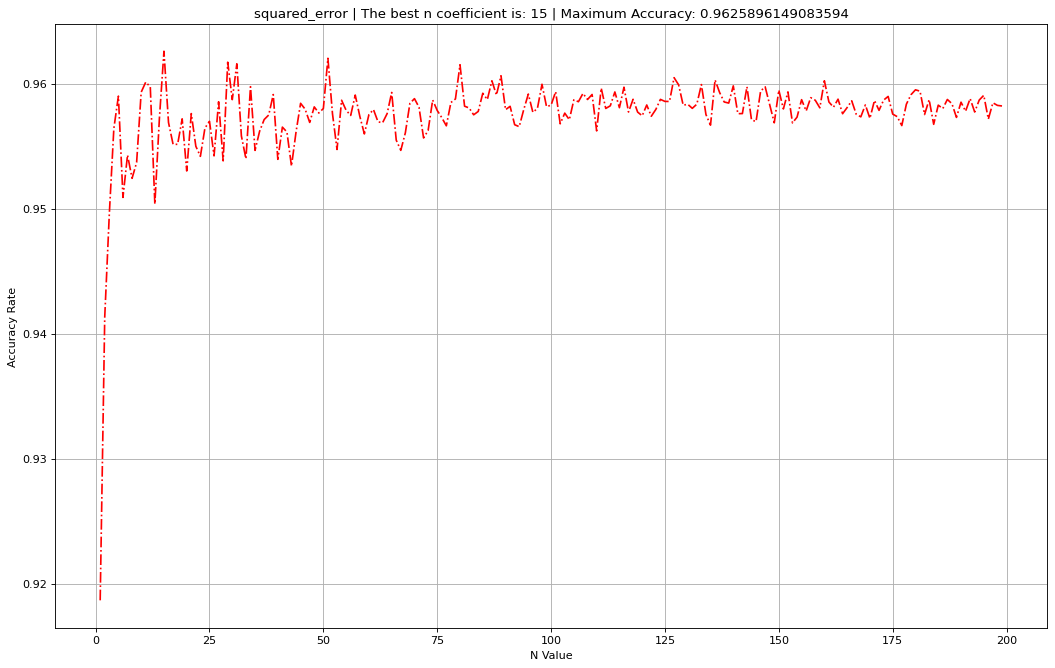

In [159]:
rfraccuracy('squared_error')

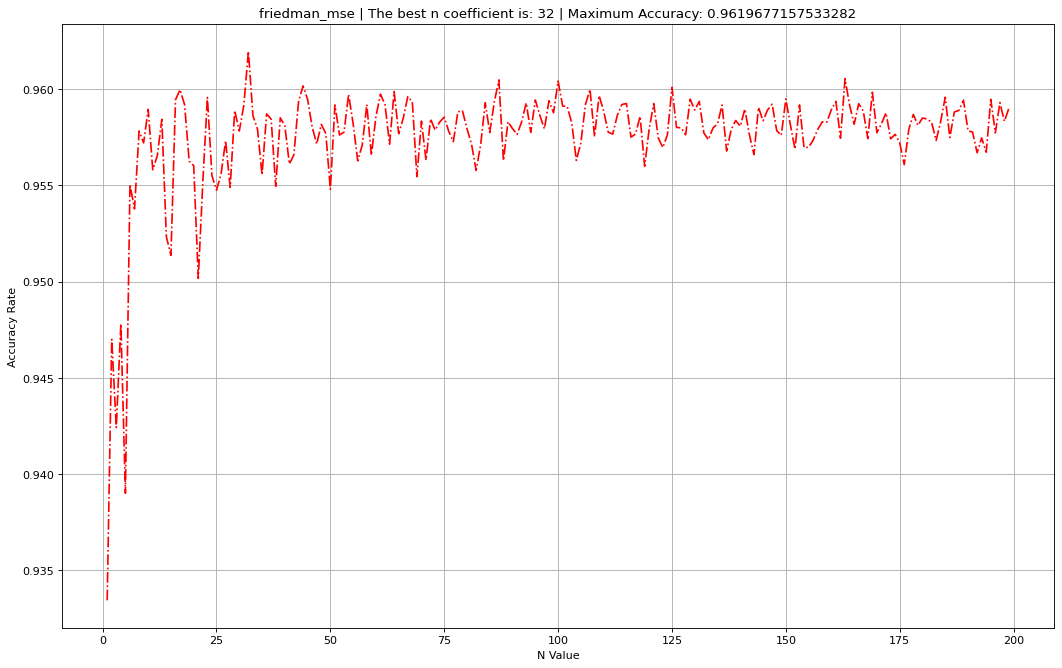

In [160]:
rfraccuracy('friedman_mse')

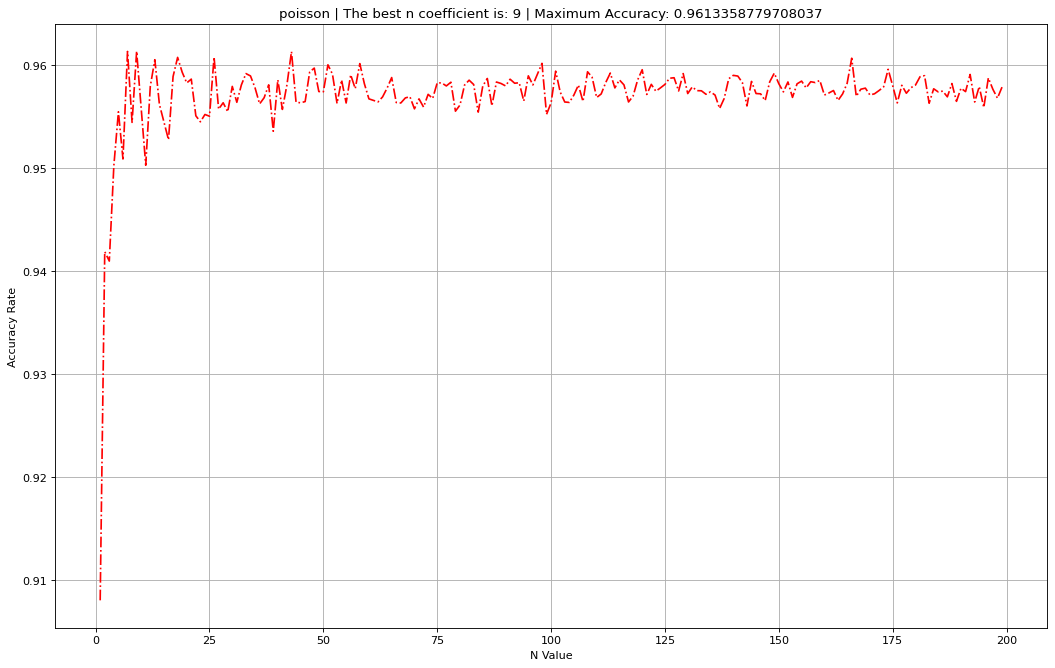

In [161]:
rfraccuracy('poisson')

#### 7.3 — GETTING THE MAXIMUM
As we said at 7.1, in order to find best results, we have to dig deep the dictionaries. So in this part, we are doing that.

In [162]:
rfr_0_metric, rfr_0_n, rfr_0_value = [], [], []

for i,j in zip(metrics_rfr,metrics_rfr.values()):
    rfr_0_metric.append(i)
    rfr_0_n.append(j[0])
    rfr_0_value.append(j[1])

rfr_best_value = 0

for q in rfr_0_value:
    for i in q:
        while True:
            if rfr_best_value < max(i):
                rfr_best_value = max(i)
                break
            else:
                break

rfr_best_metric, rfr_best_n = rfr_0_metric[rfr_0_value.index(max(rfr_0_value))], rfr_0_n[rfr_0_value.index(max(rfr_0_value))]

#### 8.0 — M.L. APPLICATION
* Support Vector Machine Regressor
* XGBoost Regressor
* Random Forest Regressor
* Linear Regressor

In [170]:
# Model Selection
SVCR = SVR(kernel='rbf')
XGBR = XGBRegressor(learning_rate = 0.05)
RFR = RandomForestRegressor(n_estimators=rfr_best_n, criterion=rfr_best_metric)
LNR = LinearRegression()

def resume(model, title):

    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)

    R2 = round(r2_score(y_test, y_predicted)*100,3)
    MSE = round(mean_squared_error(y_test, y_predicted)*100,3)
    MAE = round(mean_absolute_error(y_test, y_predicted)*100,3)

    res = pd.DataFrame()
    res['True'], res['Pred'] = y_test, y_predicted

    print(res)
    
    plt.figure(figsize=(16,10),dpi=80)
    plt.grid()
    plt.plot(range(0,len(y_test)),y_test,c='green',label='True Values')
    plt.scatter(range(0,len(y_predicted)),y_predicted,c='red',label='Predicted Values',s=10)
    plt.title(f'R2 Score: {R2} | Mean Squared Error: {MSE} | Mean Absoulute Error: {MAE}')
    plt.legend()
    plt.show()

      True       Pred
0    112.0  35.323783
1     34.0  35.684374
2      1.0   2.838318
3      8.0   4.538795
4      2.0   1.975924
..     ...        ...
468    1.0   4.062776
469   39.0  31.058845
470    0.0   2.455368
471    6.0   9.143339
472   24.0  29.592895

[473 rows x 2 columns]


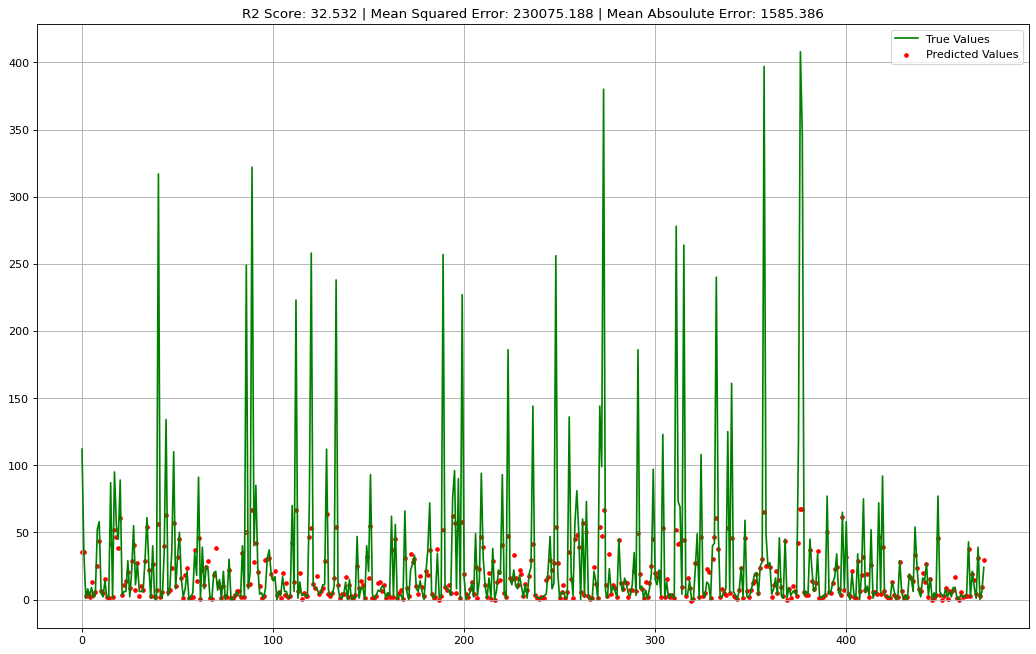

In [171]:
resume(SVCR, 'Support Vector Machine Regressor:')

      True        Pred
0    112.0  104.778229
1     34.0   36.658230
2      1.0    1.495897
3      8.0    6.958346
4      2.0    4.140145
..     ...         ...
468    1.0   10.005210
469   39.0   37.328617
470    0.0    0.379132
471    6.0    6.417902
472   24.0   24.571505

[473 rows x 2 columns]


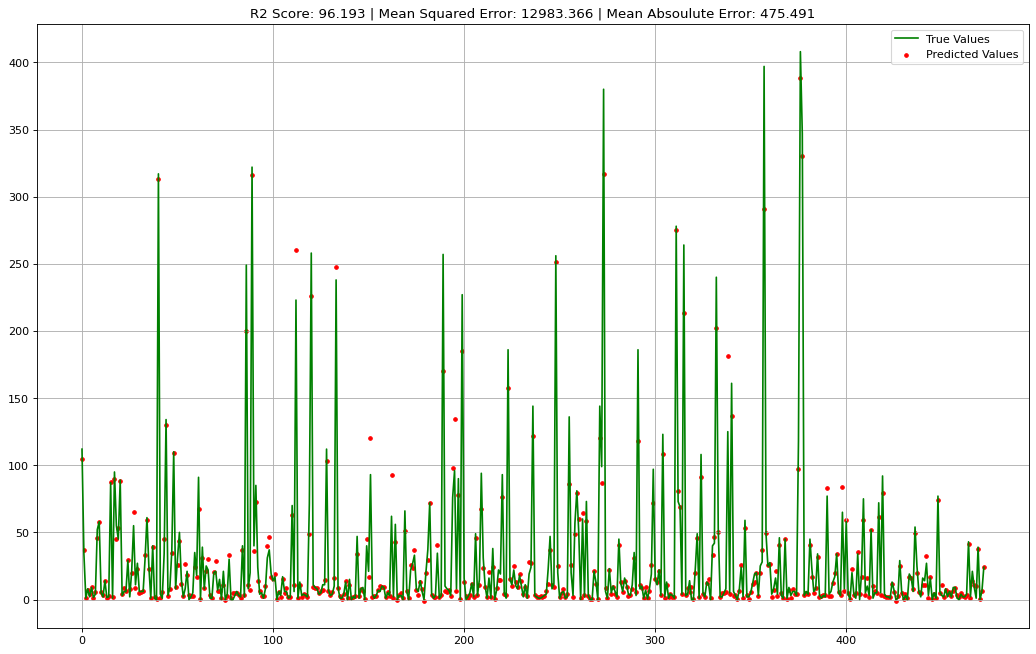

In [172]:
resume(XGBR, 'XGBoost Regressor:')

      True        Pred
0    112.0  112.437500
1     34.0   39.015625
2      1.0    1.721875
3      8.0    8.218750
4      2.0    2.375000
..     ...         ...
468    1.0    1.328125
469   39.0   38.062500
470    0.0    0.812500
471    6.0    6.843750
472   24.0   24.031250

[473 rows x 2 columns]


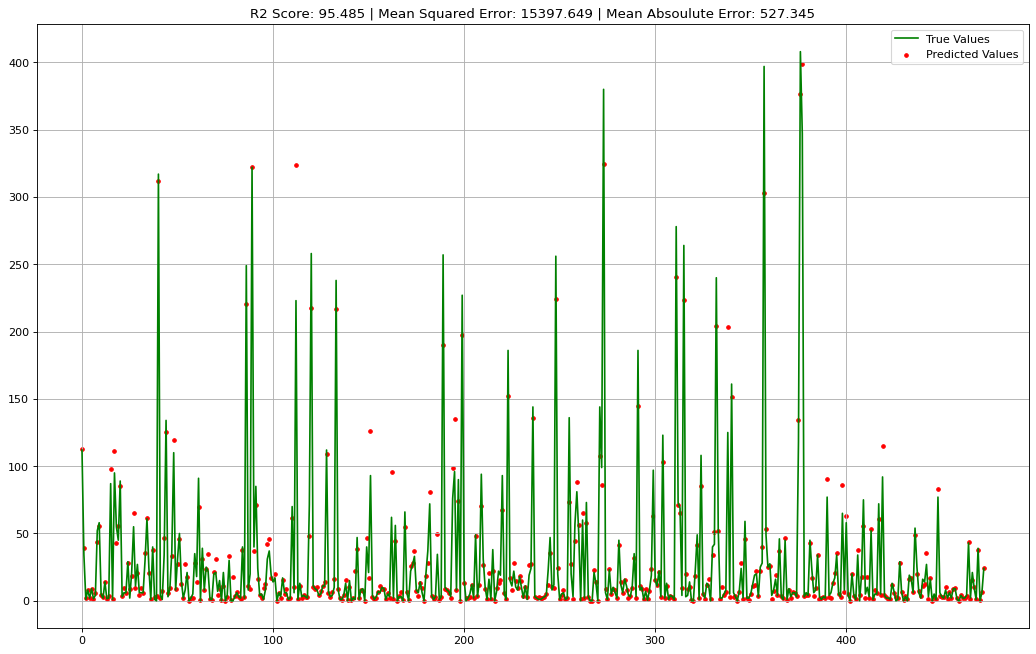

In [173]:
resume(RFR, 'Random Forest Regressor:')

      True       Pred
0    112.0  70.853696
1     34.0  53.378046
2      1.0 -33.622145
3      8.0  11.044316
4      2.0 -15.365515
..     ...        ...
468    1.0 -53.089209
469   39.0  46.560136
470    0.0  12.150935
471    6.0  11.939674
472   24.0  51.949697

[473 rows x 2 columns]


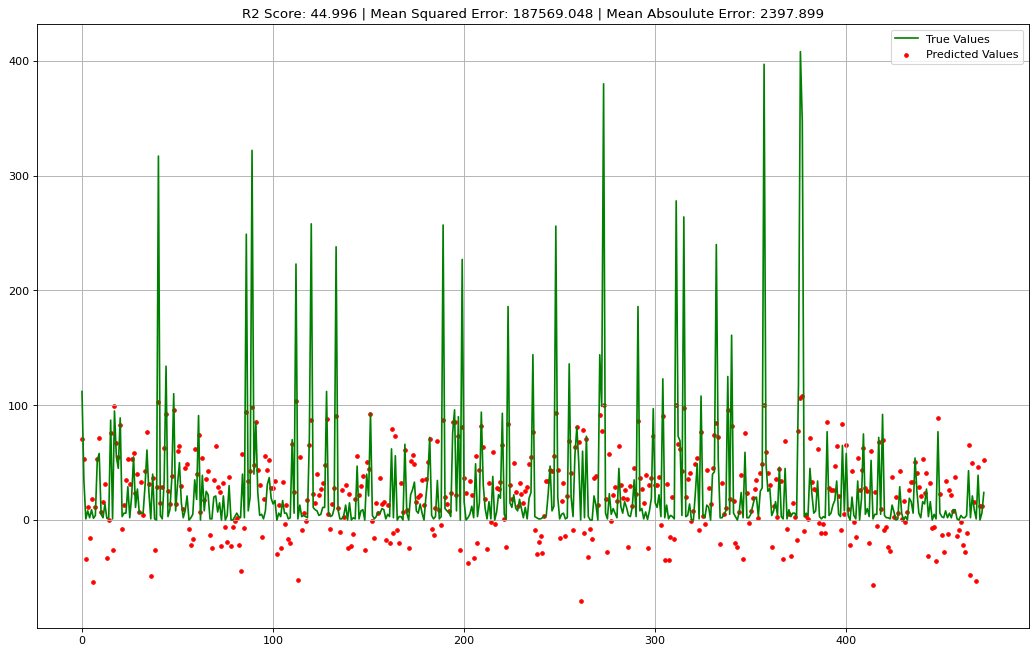

In [174]:
resume(LNR, 'Linear Regression:')